# Importation des dependances à utiliser.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Definition Des chemins

In [4]:
ROOT_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))
forecast_path = os.path.join(ROOT_DIR,"examen_weather_pipeline" "data", "processed", "forecast_meteo_global.csv")
score_path = os.path.join(ROOT_DIR,"examen_weather_pipeline", "data", "processed", "scores_meteo_global.csv")
historical_dir = os.path.join(ROOT_DIR,"examen_weather_pipeline", "data", "raw", "historical_meteo")


# Chargement des historques de données méteo.

In [5]:
historical_dfs = []

for file in os.listdir(historical_dir):
    if file.endswith(".csv"):
        city = file.replace("historical_", "").replace(".csv", "")
        path = os.path.join(historical_dir, file)
        df = pd.read_csv(path)
        df["ville"] = city
        historical_dfs.append(df)

historical_df = pd.concat(historical_dfs, ignore_index=True)

# Renommer les colonnes
historical_df.rename(columns={
    "time": "date",
    "temperature_2m_max": "temp",
    "precipitation_sum": "rain",
    "windspeed_10m_max": "wind_speed"
}, inplace=True)

# Conversion de date
historical_df["date"] = pd.to_datetime(historical_df["date"])

# Aperçu General des données

In [6]:
display(historical_df.head())
print("Villes :", historical_df["ville"].unique())
display(historical_df.describe())

,date,temp,rain,wind_speed,city,ville
0,2024-06-30,28.2,2.5,49.7,Tokyo,Tokyo
1,2024-07-01,28.0,6.7,57.1,Tokyo,Tokyo
2,2024-07-02,31.2,4.9,16.2,Tokyo,Tokyo
3,2024-07-03,31.3,1.1,20.5,Tokyo,Tokyo
4,2024-07-04,33.1,0.0,14.4,Tokyo,Tokyo


Villes : ['Tokyo' 'Rome' 'Quebec' 'Paris' 'Antananarivo' 'Mahajanga']


,date,temp,rain,wind_speed
count,2220,2213.000000,2207.000000,2213.000000
mean,2024-12-31 12:00:00.000000256,21.618391,3.226960,16.929507
min,2024-06-30 00:00:00,-17.500000,0.000000,4.900000
25%,2024-09-30 00:00:00,15.000000,0.000000,12.700000
50%,2024-12-31 12:00:00,23.200000,0.100000,16.300000
75%,2025-04-03 00:00:00,30.200000,2.600000,20.200000
max,2025-07-04 00:00:00,39.500000,89.400000,57.100000
std,NaN,10.568151,7.595974,6.045572


# Histogramme des températures par villes.

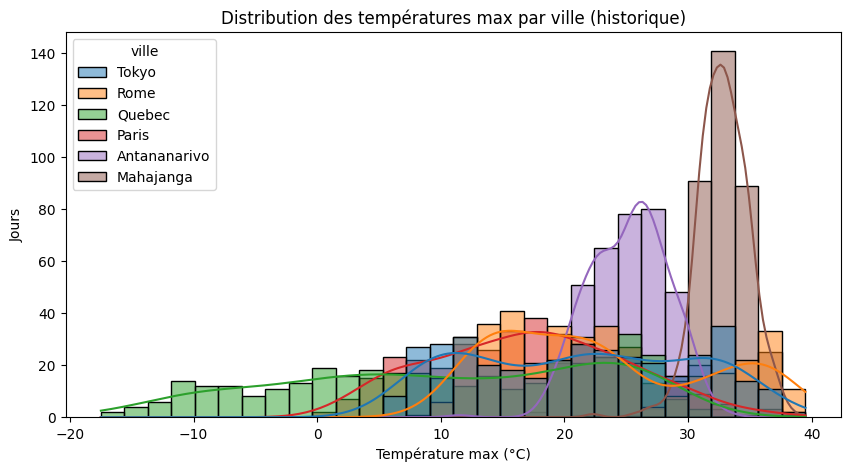

In [7]:
plt.figure(figsize=(10, 5))
sns.histplot(data=historical_df, x="temp", hue="ville", kde=True, bins=30)
plt.title("Distribution des températures max par ville (historique)")
plt.xlabel("Température max (°C)")
plt.ylabel("Jours")
plt.show()

# Boxplot température par ville

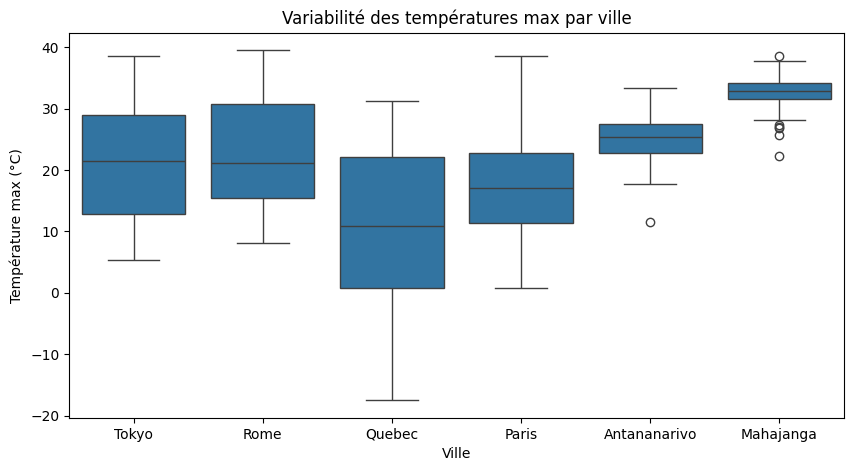

In [8]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=historical_df, x="ville", y="temp")
plt.title("Variabilité des températures max par ville")
plt.xlabel("Ville")
plt.ylabel("Température max (°C)")
plt.show()


# Scores météo globaux

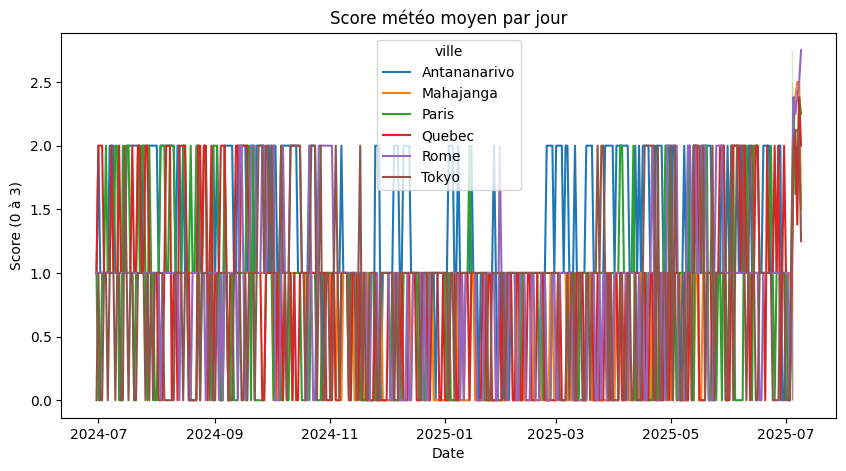

In [9]:
score_df = pd.read_csv(score_path)
score_df["date"] = pd.to_datetime(score_df["date"])

plt.figure(figsize=(10, 5))
sns.lineplot(data=score_df, x="date", y="avg_score", hue="ville")
plt.title("Score météo moyen par jour")
plt.xlabel("Date")
plt.ylabel("Score (0 à 3)")
plt.show()
